<a href="https://colab.research.google.com/github/LW068/Bettys-Cloud-Dodger/blob/main/reinforcement_learning/policy_gradients/PolicyGradients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## So Code doesnt run properly on my local machine for some reason so testing the files here:

In [10]:
!pip install gym

task 0:

In [2]:
#!/usr/bin/env python3
"""POLICY GRADIENT!!!!"""
import numpy as np


def policy(matrix, weight):
    """
    Compute the policy from a given state matrix and weight matrix.

    :param matrix: numpy.ndarray - The state matrix
    :param weight: numpy.ndarray - The weight matrix
    :return: The computed policy as a probability distribution over actions
    """
    z = np.dot(matrix, weight)
    exp = np.exp(z)
    return exp / np.sum(exp, axis=1, keepdims=True)

0-main.py:

In [7]:
weight = np.ndarray((4, 2), buffer=np.array([
    [4.17022005e-01, 7.20324493e-01],
    [1.14374817e-04, 3.02332573e-01],
    [1.46755891e-01, 9.23385948e-02],
    [1.86260211e-01, 3.45560727e-01]
    ]))
state = np.ndarray((1, 4), buffer=np.array([
    [-0.04428214,  0.01636746,  0.01196594, -0.03095031]
    ]))

res = policy(state, weight)
print(res)

[[0.50351642 0.49648358]]


Task 2

In [3]:
def policy_gradient(state, weight):
    """
    Compute the Monte-Carlo policy gradient.

    :param state: matrix representing the current observation of the environment
    :param weight: matrix of random weight
    :return: the action and the gradient (in this order)
    """
    probs = policy(state, weight)
    action = np.random.choice(len(probs[0]), p=probs[0])

    # constructing the softmax gradient
    softmax_grad = np.diag(probs.ravel()) - np.outer(probs, probs)
    selected_action_grad = softmax_grad[action]

    # computing the gradient of the log probability
    log_prob_grad = selected_action_grad / probs[0, action]

    # Fginal gradient with respect to weights
    gradient = np.dot(state.T, log_prob_grad.reshape(1, -1))

    return action, gradient

1-main.py:

In [30]:
import gym

env = gym.make('CartPole-v1')
np.random.seed(1)

weight = np.random.rand(4, 2)
state = env.reset()
state = np.array([state])  # Adjust state to 2D if necessary

action, grad = policy_gradient(state, weight)
print("Action:", action)
print("Gradient:\n", grad)

env.close()


Action: 0
Gradient:
 [[ 0.01571237 -0.01571237]
 [-0.00956668  0.00956668]
 [ 0.01811778 -0.01811778]
 [ 0.01708613 -0.01708613]]


Task 2:

In [4]:
def train(env, nb_episodes, alpha=0.000045, gamma=0.98):
    """
    Implement a full trainign.

    :param env: initial environment
    :param nb_episodes: number of episodes used for training
    :param alpha: the learning rate
    :param gamma: the discount factor
    :return: all values of the score (sum of all rewards during one episode loop)
    """
    weight = np.random.rand(4, 2)
    scores = []

    for episode in range(nb_episodes):
        state = env.reset()
        state = np.array([state])
        episode_rewards = 0
        while True:
            action, grad = policy_gradient(state, weight)
            state, reward, done, _ = env.step(action)
            state = np.array([state])
            weight += alpha * grad * reward
            episode_rewards += reward

            if done:
                break

        scores.append(episode_rewards)
        print(f"Episode: {episode+1}, Score: {episode_rewards}", end="\r", flush=True)

    return scores

2-main,py:

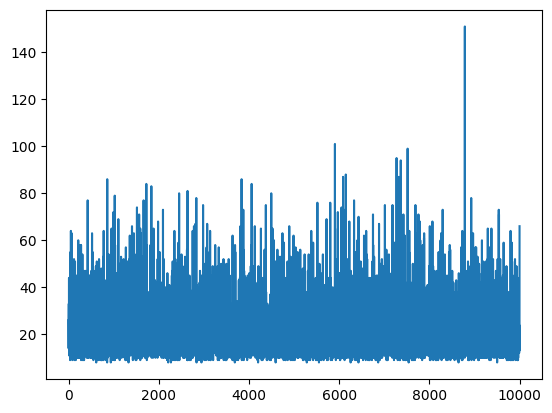

In [33]:
env = gym.make('CartPole-v1')

scores = train(env, 10000)

plt.plot(np.arange(len(scores)), scores)
plt.show()
env.close()

## Testing All in One block if it makes a diff (shouldnt)

In [36]:
def train(env, nb_episodes, alpha=0.000045, gamma=0.98):
    """
    Implement a full trainign.

    :param env: initial environment
    :param nb_episodes: number of episodes used for training
    :param alpha: the learning rate
    :param gamma: the discount factor
    :return: all values of the score (sum of all rewards during one episode loop)
    """
    weight = np.random.rand(4, 2)
    scores = []

    for episode in range(nb_episodes):
        state = env.reset()
        state = np.array([state])
        episode_rewards = 0
        while True:
            action, grad = policy_gradient(state, weight)
            state, reward, done, _ = env.step(action)
            state = np.array([state])
            weight += alpha * grad * reward
            episode_rewards += reward

            if done:
                break

        scores.append(episode_rewards)
        print(f"Episode: {episode+1}, Score: {episode_rewards}", end="\r", flush=True)

    return scores


def policy(matrix, weight):
    """
    Compute the policy from a given state matrix and weight matrix.

    :param matrix: numpy.ndarray - The state matrix
    :param weight: numpy.ndarray - The weight matrix
    :return: The computed policy as a probability distribution over actions
    """
    z = np.dot(matrix, weight)
    exp = np.exp(z)
    return exp / np.sum(exp, axis=1, keepdims=True)


def policy_gradient(state, weight):
    """
    Compute the Monte-Carlo policy gradient.

    :param state: matrix representing the current observation of the environment
    :param weight: matrix of random weight
    :return: the action and the gradient (in this order)
    """
    probs = policy(state, weight)
    action = np.random.choice(len(probs[0]), p=probs[0])

    # constructing the softmax gradient
    softmax_grad = np.diag(probs.ravel()) - np.outer(probs, probs)
    selected_action_grad = softmax_grad[action]

    # computing the gradient of the log probability
    log_prob_grad = selected_action_grad / probs[0, action]

    # Fginal gradient with respect to weights
    gradient = np.dot(state.T, log_prob_grad.reshape(1, -1))

    return action, gradient

Same 2-main.py

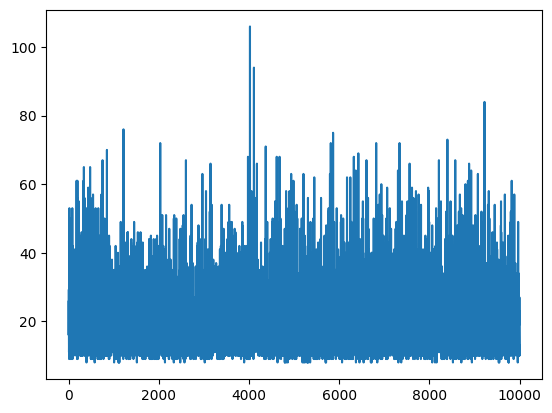

In [35]:
env = gym.make('CartPole-v1')

scores = train(env, 10000)

plt.plot(np.arange(len(scores)), scores)
plt.show()
env.close()

Final Task 3 Animation

In [6]:
def train(env, nb_episodes, alpha=0.000045, gamma=0.98, show_result=False):
    """
    Implement a full trainign.

    :param env: initial environment
    :param nb_episodes: number of episodes used for training
    :param alpha: the learning rate
    :param gamma: the discount factor
    :return: all values of the score (sum of all rewards during one episode loop)
    """
    weight = np.random.rand(4, 2)
    scores = []

    for episode in range(nb_episodes):
        state = env.reset()
        state = np.array([state])
        episode_rewards = 0

        while True:
            action, grad = policy_gradient(state, weight)
            state, reward, done, _ = env.step(action)
            state = np.array([state])
            weight += alpha * grad * reward
            episode_rewards += reward

            if done:
                break

        scores.append(episode_rewards)

        if show_result and episode % 1000 == 0:
            print(f"Episode: {episode+1}, Score: {episode_rewards}")
            env.render()

        print(f"Episode: {episode+1}, Score: {episode_rewards}", end="\r", flush=True)

    return scores

3-main.py: (added rendermode human)

In [41]:
env = gym.make('CartPole-v1')

scores = train(env, 10000, 0.000045, 0.98, True)

env.close()

Episode: 1, Score: 13.0
Episode: 1001, Score: 11.0
Episode: 2001, Score: 18.0
Episode: 3001, Score: 11.0
Episode: 4001, Score: 10.0
Episode: 5001, Score: 8.0
Episode: 6001, Score: 19.0
Episode: 7001, Score: 13.0
Episode: 8001, Score: 10.0
Episode: 9001, Score: 12.0


## Attempting to display animation

In [7]:
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [8]:
!apt-get install -y xvfb python-opengl ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package python-opengl


In [9]:
!sudo apt-get update
!sudo apt-get install -y xvfb python3-opengl ffmpeg

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-opengl is already the newest version (3.1.5+dfsg-1).
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
xvfb is alre

In [10]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [41]:
def train(env, nb_episodes, alpha=0.000045, gamma=0.98, show_result=False):
    if show_result:
        env = gym.make('CartPole-v1', render_mode='rgb_array')  # Set render_mode for recording
        env = Monitor(env, './video', force=True, video_callable=lambda episode: episode % 1000 == 0)


    weight = np.random.rand(4, 2)
    scores = []

    for episode in range(nb_episodes):
        state = env.reset()
        print("State shape:", np.array(state).shape)
        state = np.array(state, dtype=object).reshape(1, 4)
        episode_rewards = 0

        while True:
            action, grad = policy_gradient(state, weight)
            state, reward, done, _ = env.step(action)
            print("State shape:", np.array(state).shape)
            state = np.array(state, dtype=object).reshape(1, 4)
            weight += alpha * grad * reward
            episode_rewards += reward

            if done:
                break

        scores.append(episode_rewards)

        if show_result:
            env.close()

In [12]:
from IPython.display import HTML
from base64 import b64encode

def show_video():
    mp4list = [f"./video/{mp4}" for mp4 in os.listdir("./video") if mp4.endswith(".mp4")]
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = open(mp4, 'rb').read()
        data_url = "data:video/mp4;base64," + b64encode(video).decode()
        return HTML("""
        <video width=400 controls>
            <source src="%s" type="video/mp4">
        </video>
        """ % data_url)
    else:
        return "No videos found"

In [1]:
!pip install --upgrade gym


In [16]:
!pip uninstall -y gym
!pip install gym==0.17.3


Found existing installation: gym 0.26.2
Uninstalling gym-0.26.2:
  Successfully uninstalled gym-0.26.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.3 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.17.3-py3-none-any.whl size=1654618 sha256=eaf494d602c819d10753ea9ca7a23b0437d98c603b1ac8341827373b91a297d5
  Stored in directory: /root/.cache/pip/wheels/af/4b/74/fcfc8238472c34d7f96508a63c962ff3ac9485a9a4137afd4e
Successfully built gym
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 2.2.1
    Uninstalling cloudpickle-2.2.1:
      Successfully uninstalled cloudpickle-2.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.19.2 requires cloudpickle>=2.0.0, but you have cloudpickle 1.6.

In [17]:
import gym
from gym.wrappers.monitor import Monitor
import numpy as np
from pyvirtualdisplay import Display

In [42]:
env = gym.make('CartPole-v1')
scores = train(env, 10000, 0.000045, 0.98, True)
env.close()
show_video()

State shape: (2,)


<ipython-input-41-d64c50dc4e30>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print("State shape:", np.array(state).shape)


ValueError: cannot reshape array of size 2 into shape (1,4)

Couldnt get this to work. I did try to reshape array but wouldn't work.

